## Who Gets Selected For Funding? - Gradient Boost (random forest)

In [34]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier as grbst
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import f1_score,recall_score, accuracy_score

df = pd.read_csv('datalocation')

## Training & Test Set

In [35]:
#randomly split up train and test
numitems = len(df)
percenttrain = 0.6
numtrain = int(numitems*percenttrain)
numtest = numitems - numtrain

#scramble up the indices in the df so that it is random
df = df.sample(frac=1).reset_index(drop=True)
traindf = df[0:numtrain]
testdf = df[numtrain:]
traindf = traindf.reset_index(drop=True)
testdf = testdf.reset_index(drop=True)

In [36]:
#use weights to increase 'funded' sample
from sklearn.utils.class_weight import compute_sample_weight
y = traindf['Funded']
weight = compute_sample_weight(class_weight='balanced', y=y)

## The Model

In [37]:
features = ['CTOnum', 'FemNum', 'TeamSolo', 'dist']
trees = 100
leafs = 10 #optional parameter
rf = grbst(n_estimators=trees, min_samples_leaf=leafs)
rtree = rf.fit(traindf[features],traindf['Funded'], sample_weight=weight) 

#predictions = rf.predict(testdf[features])
#use probabilities instead, in order to optimize for recall
pred = rf.predict_proba(testdf[features])

In [38]:
#convert prediction probabilities to 0's and 1's using threshold of 0.7 instead of default 0.5
#if first column < .7, then put 0
#if second column > .7, put as 1
#if pred[[1]] > .7, 1 else 0
pred = pd.DataFrame(pred)
predictions = (pred[[0]] < 0.7).astype('int')
predictions=predictions.values

## Checking Accuracy

In [40]:
numtrain = len(traindf)
numtest = len(testdf)
numyes = len(testdf[testdf['Funded'] == 1])
numno = len(testdf[testdf['Funded'] == 0])

correct = 0
misclassification = 0
true_positive = 0 #aka sensitivitity or recall
false_positive = 0 #type 1 error
specificity = 0 #when its no, how often does it say no; true negatives
false_negative = 0 #type 2 error
predicted_yes = 0

for i in range(numtest):
    #print('Predicted:', predictions[i], ' Actual:', testdf.loc[numtrain+i]['category'])
    if predictions[i] == testdf.loc[i]['Funded']: correct +=1
    if predictions[i] != testdf.loc[i]['Funded']: misclassification +=1
    if predictions[i] == 1 and testdf.loc[i]['Funded'] ==1: true_positive +=1
    if predictions[i] == 1 and testdf.loc[i]['Funded'] ==0: false_positive +=1 
    if predictions[i] == 0 and testdf.loc[i]['Funded'] ==0: specificity +=1
    if predictions[i] == 0 and testdf.loc[i]['Funded'] ==1: false_negative +=1
    if predictions[i] == 1: predicted_yes +=1

print('Accuracy:', float(correct)/float(numtest))
print('Misclassification/Error Rate', float(misclassification)/float(numtest))
print('True Positive Rate/Recall...most important', float(true_positive)/float(numyes))
print('False Positive Rate', float(false_positive)/float(numno))
print('Specificity/True Negatives', float(specificity)/float(numno))

Accuracy: 0.6785714285714286
Misclassification/Error Rate 0.32142857142857145
True Positive Rate/Recall...most important 0.4
False Positive Rate 0.31754874651810583
Specificity/True Negatives 0.6824512534818942


## Plotting Feature Importance

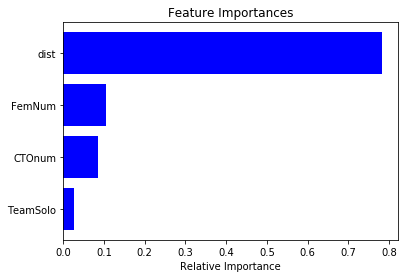

In [42]:
predictors = ['CTOnum','FemNum', 'TeamSolo', 'dist']
importances = rf.feature_importances_
indices = np.argsort(importances)
ylabs = [predictors[i] for i in indices]

pyplot.title('Feature Importances')
pyplot.barh(range(len(indices)), importances[indices], color='b', align='center')
pyplot.yticks(range(len(indices)), ylabs)
pyplot.xlabel('Relative Importance')
pyplot.show()

## Sanity check, including 'InitScore' as a predictor

In [43]:
features = ['InitScore', 'CTOnum', 'FemNum', 'TeamSolo', 'dist']
trees = 100
leafs = 10 #optional parameter
rf = grbst(n_estimators=trees, min_samples_leaf=leafs)
rtree = rf.fit(traindf[features],traindf['Funded'], sample_weight=weight) 

#use probabilities, in order to change threshold to optimize for recall
pred = rf.predict_proba(testdf[features])

In [44]:
#convert prediction probabilities to 0's and 1's using threshold of 0.7 instead of default 0.5
#if first column < .7, then put 0
#if second column > .7, put as 1
#if pred[[1]] > .7, 1 else 0
pred = pd.DataFrame(pred)
predictions = (pred[[0]] < 0.7).astype('int')
predictions=predictions.values

## Calculate Accuracy

In [45]:
numtrain = len(traindf)
numtest = len(testdf)
numyes = len(testdf[testdf['Funded'] == 1])
numno = len(testdf[testdf['Funded'] == 0])

correct = 0
misclassification = 0
true_positive = 0 #aka sensitivitity or recall
false_positive = 0 #type 1 error
specificity = 0 #when its no, how often does it say no; true negatives
false_negative = 0 #type 2 error
predicted_yes = 0

for i in range(numtest):
    #print('Predicted:', predictions[i], ' Actual:', testdf.loc[numtrain+i]['category'])
    if predictions[i] == testdf.loc[i]['Funded']: correct +=1
    if predictions[i] != testdf.loc[i]['Funded']: misclassification +=1
    if predictions[i] == 1 and testdf.loc[i]['Funded'] ==1: true_positive +=1
    if predictions[i] == 1 and testdf.loc[i]['Funded'] ==0: false_positive +=1 
    if predictions[i] == 0 and testdf.loc[i]['Funded'] ==0: specificity +=1
    if predictions[i] == 0 and testdf.loc[i]['Funded'] ==1: false_negative +=1
    if predictions[i] == 1: predicted_yes +=1

print('Accuracy:', float(correct)/float(numtest))
print('Misclassification/Error Rate', float(misclassification)/float(numtest))
print('True Positive Rate/Recall...most important', float(true_positive)/float(numyes))
print('False Positive Rate', float(false_positive)/float(numno))
print('Specificity/True Negatives', float(specificity)/float(numno))

Accuracy: 0.8983516483516484
Misclassification/Error Rate 0.10164835164835165
True Positive Rate/Recall...most important 0.6
False Positive Rate 0.09749303621169916
Specificity/True Negatives 0.9025069637883009


## Plotting Feature Importance

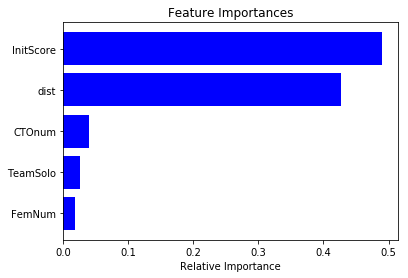

In [46]:
predictors = ['InitScore', 'CTOnum','FemNum', 'TeamSolo', 'dist']
importances = rf.feature_importances_
indices = np.argsort(importances)
ylabs = [predictors[i] for i in indices]

pyplot.title('Feature Importances')
pyplot.barh(range(len(indices)), importances[indices], color='b', align='center')
pyplot.yticks(range(len(indices)), ylabs)
pyplot.xlabel('Relative Importance')
pyplot.show()